# 2D Motion with Drag
Arush Bodla  
Block 2 AP Physics C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

My situation is Pranav kicking a soccer ball across the field to score a goal.   
Here are the different initial values:

In [2]:
# Projectile info: Drag Coefficient (Cd), Radius (r), Mass (m), Cross Sectional Area (A)
Cd = 0.5
r = 0.11
A = np.pi * r**2
m = 0.5

# Environment info: Air Density (rho_air), Gravity (g)
rho_air = 1.28
g = 9.81



$F_d = \frac{1}{2}\rho_a C_d A v^2 = bv^2$  
  
&nbsp;&nbsp;&nbsp;$b = \frac{1}{2} \rho_a C_d A$


Below are the same calculations as the document describes to generate the initial trajectories.

In [3]:
b = 0.5 * Cd * A * rho_air

v0 = 25
theta = np.pi / 4

In [4]:
def deriv(t, u):
    x, vx, y, vy = u
    speed = np.sqrt(vx**2 + vy**2)
    ax = -b/m * speed * vx
    ay = -b/m * speed * vy - g
    return vx, ax, vy, ay

def hit_target(t, u):
    return u[2]
hit_target.terminal = True
hit_target.direction = -1

def max_height(t, u):
    return u[3]

In [5]:
# Initial Conditions
u0 = 0, v0 * np.cos(theta), 0, v0 * np.sin(theta)

#Time span
t0 = 0
tf = 10

In [6]:
solution = solve_ivp(deriv, [t0, tf], u0, dense_output=True, events=[hit_target, max_height])

In [7]:
t = ((2 * v0) * np.sin(theta)) / g
t1 = np.linspace(0, t, 1000)

xnd = v0 * np.cos(theta) * t1
ynd = v0 * np.sin(theta) * t1 - 0.5 * g * t1**2

In [8]:
print(solution)

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  5.657e-05  6.222e-04  6.279e-03  6.284e-02
             5.604e-01  1.396e+00  2.762e+00  2.885e+00]
        y: [[ 0.000e+00  9.999e-04 ...  3.040e+01  3.126e+01]
            [ 1.768e+01  1.768e+01 ...  7.154e+00  6.867e+00]
            [ 0.000e+00  9.999e-04 ...  1.449e+00 -1.998e-15]
            [ 1.768e+01  1.768e+01 ... -1.150e+01 -1.221e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f1db8790350>
 t_events: [array([ 2.885e+00]), array([ 1.330e+00])]
 y_events: [array([[ 3.126e+01,  6.867e+00, -1.998e-15, -1.221e+01]]), array([[ 1.773e+01,  1.061e+01,  1.032e+01,  1.776e-15]])]
     nfev: 56
     njev: 0
      nlu: 0


Here is some information about the trajectory:

In [9]:
print(f'Time to target: {t:.2f} s')
print(f'Time to max height: {solution.t_events[1][0]:.2f} s')

Time to target: 3.60 s
Time to max height: 1.33 s


In [10]:
T = np.linspace(0, solution.t[-1], 1000)

sol = solution.sol(T)
x, y = sol[0], sol[2]
print(f"Target distance: {x[-1]:.2f}m")
print(f"Max height: {np.max(y):.2f}m")

Target distance: 31.26m
Max height: 10.32m


These are the trajectories with and without drag for kicking at 25 $\frac{m}{s}$ and 45°.

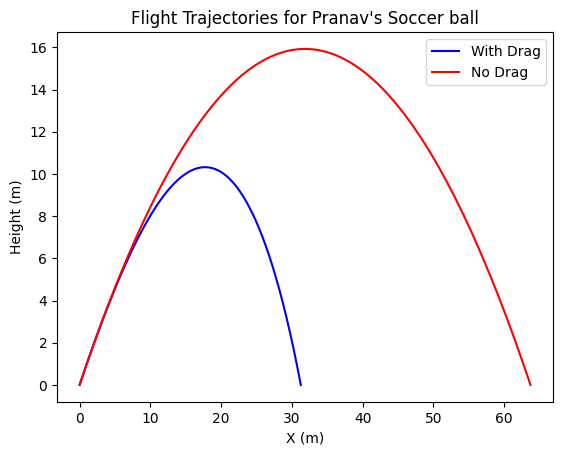

In [11]:
plt.plot(x, y, color='blue', label='With Drag')
plt.plot(xnd, ynd, color='red', label='No Drag')
plt.xlabel("X (m)")
plt.ylabel("Height (m)")
plt.legend()
plt.title("Flight Trajectories for Pranav's Soccer ball")
plt.show()

Both trajectories start out very similar, before the drag force makes a significant impact. The 

Here are the trajectories for a variety of different initial velocities. Below, I'm defining a helper function that computes the trajectory for a given initial velocity.

In [12]:
def compute_trajectory(v0, theta=np.pi/4):
    def deriv(t, u):
        x, vx, y, vy = u
        speed = np.sqrt(vx**2 + vy**2)
        ax = -b/m * speed * vx
        ay = -b/m * speed * vy - g
        return vx, ax, vy, ay

    def hit_target(t, u):
        return u[2] 
    hit_target.terminal = True
    hit_target.direction = -1

    u0 = [0, v0 * np.cos(theta), 0, v0 * np.sin(theta)]
    t0, tf = 0, 10

    solution = solve_ivp(
        deriv, [t0, tf], u0, events=hit_target, dense_output=True, 
        rtol=1e-6, atol=1e-8
    )

    T = np.linspace(0, solution.t_events[0][0], 1000)  # Time up to impact
    sol = solution.sol(T)
    y = sol[2]
    x = sol[0]
    return T, y, x

Here, I'm calculating the different trajectories for various initial velocities.

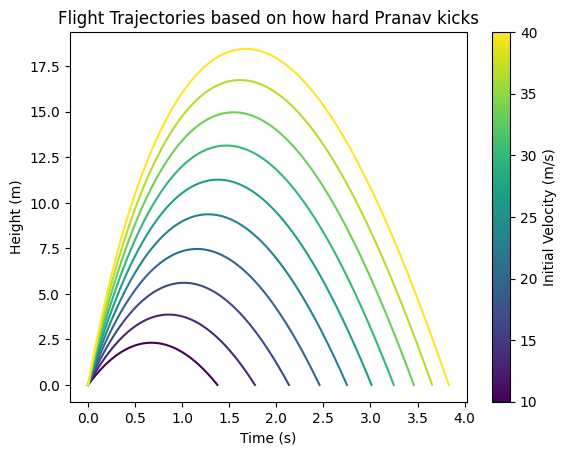

In [13]:
from matplotlib.cm import ScalarMappable

v0s = np.linspace(10, 40, 10)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(v0s)))

for v0 in v0s:
    T, y, x = compute_trajectory(v0)
    plt.plot(T, y, color=colors[v0s == v0][0])
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Flight Trajectories based on how hard Pranav kicks")
plt.colorbar(ax=plt.gca(), mappable=ScalarMappable(cmap=cmap, norm=plt.Normalize(v0s.min(), v0s.max())), label="Initial Velocity (m/s)")
plt.show()

It looks like as the ball moves faster, the drag affects the trajectory more. This makes sense since drag is proportional to $v^2$. Below are the trajetories for various launch angles.

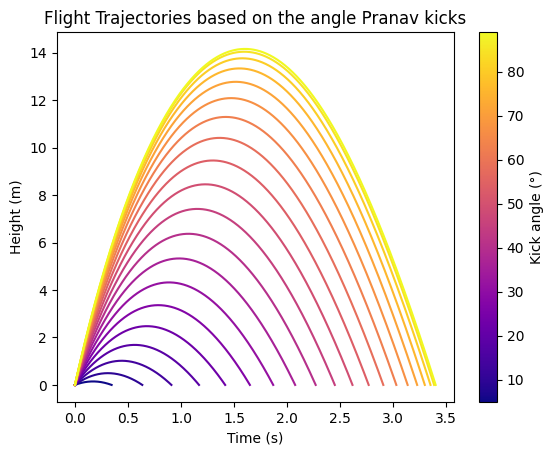

In [14]:
from matplotlib.cm import ScalarMappable

theta0s = np.linspace(5, 89, 20)

cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(theta0s)))

for theta0 in theta0s:
    T, y, x = compute_trajectory(20, np.deg2rad(theta0))
    plt.plot(T, y, color=colors[theta0s == theta0][0])
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Flight Trajectories based on the angle Pranav kicks")
plt.colorbar(ax=plt.gca(), mappable=ScalarMappable(cmap=cmap, norm=plt.Normalize(theta0s.min(), theta0s.max())), label="Kick angle (°)")
plt.show()

It looks like the initial velocity and the angle make the same effect, but that's most likely because the graphs are height vs time, rather than height vs distance. Plotting those might provide a bigger insight into the actual movement path of the object with drag.

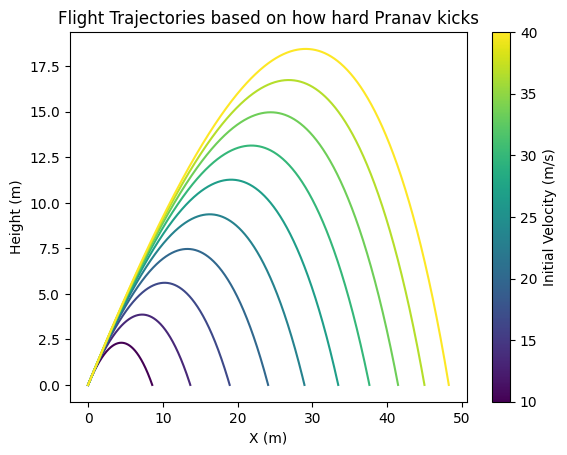

In [15]:
from matplotlib.cm import ScalarMappable

v0s = np.linspace(10, 40, 10)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(v0s)))

for v0 in v0s:
    T, y, x = compute_trajectory(v0)
    plt.plot(x, y, color=colors[v0s == v0][0])
plt.xlabel("X (m)")
plt.ylabel("Height (m)")
plt.title("Flight Trajectories based on how hard Pranav kicks")
plt.colorbar(ax=plt.gca(), mappable=ScalarMappable(cmap=cmap, norm=plt.Normalize(v0s.min(), v0s.max())), label="Initial Velocity (m/s)")
plt.show()

The affect of drag is much clearer here, with the faster velocity "parabolas" being much more deformed than the slower ones. Below is the graph of the different kick angles.

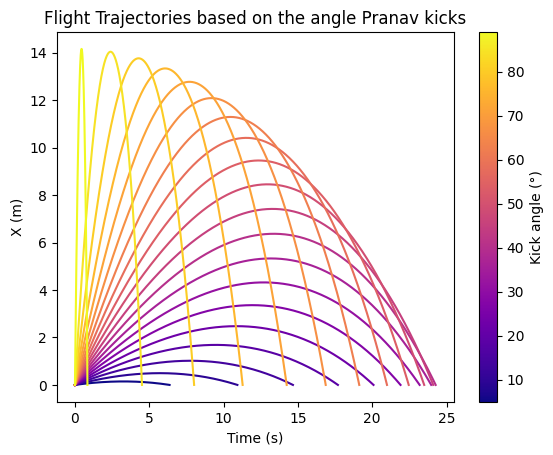

In [16]:
from matplotlib.cm import ScalarMappable

theta0s = np.linspace(5, 89, 20)

cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(theta0s)))

for theta0 in theta0s:
    T, y, x = compute_trajectory(20, np.deg2rad(theta0))
    if theta0 == 45:
        plt.plot(T, y, color='green')
    else:
        plt.plot(x, y, color=colors[theta0s == theta0][0])
plt.xlabel("Time (s)")
plt.ylabel("X (m)")
plt.title("Flight Trajectories based on the angle Pranav kicks")
plt.colorbar(ax=plt.gca(), mappable=ScalarMappable(cmap=cmap, norm=plt.Normalize(theta0s.min(), theta0s.max())), label="Kick angle (°)")
plt.show()

It looks like the trajectories of the different angles form like a circular shape when they're all put together.